In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
profit_data_df = pd.read_csv("Resources/Profit_margin.csv")
profit_data_df.head()
appl_stock_df = pd.read_csv("Resources/AAPL.csv")
appl_stock_df
profit_data_df


,Date,TTM Revenue,TTM Net Income,Net Margin
0,9/30/2023,$383.29B,$97.00B,25.31%
1,6/30/2023,$383.93B,$94.76B,24.68%
2,3/31/2023,$385.10B,$94.32B,24.49%
3,12/31/2022,$387.54B,$95.17B,24.56%
4,9/30/2022,$394.33B,$99.80B,25.31%
5,6/30/2022,$387.54B,$99.63B,25.71%
6,3/31/2022,$386.02B,$101.94B,26.41%
7,12/31/2021,$378.32B,$100.56B,26.58%
8,9/30/2021,$365.82B,$94.68B,25.88%
9,6/30/2021,$347.16B,$86.80B,25.00%


In [3]:
profit_data_df.head()


,Date,TTM Revenue,TTM Net Income,Net Margin
0,9/30/2023,$383.29B,$97.00B,25.31%
1,6/30/2023,$383.93B,$94.76B,24.68%
2,3/31/2023,$385.10B,$94.32B,24.49%
3,12/31/2022,$387.54B,$95.17B,24.56%
4,9/30/2022,$394.33B,$99.80B,25.31%


In [4]:

profit_data_df['Date'] =pd.to_datetime(profit_data_df.Date)
profit_data_df

,Date,TTM Revenue,TTM Net Income,Net Margin
0,2023-09-30,$383.29B,$97.00B,25.31%
1,2023-06-30,$383.93B,$94.76B,24.68%
2,2023-03-31,$385.10B,$94.32B,24.49%
3,2022-12-31,$387.54B,$95.17B,24.56%
4,2022-09-30,$394.33B,$99.80B,25.31%
5,2022-06-30,$387.54B,$99.63B,25.71%
6,2022-03-31,$386.02B,$101.94B,26.41%
7,2021-12-31,$378.32B,$100.56B,26.58%
8,2021-09-30,$365.82B,$94.68B,25.88%
9,2021-06-30,$347.16B,$86.80B,25.00%


In [5]:
appl_stock_df['Date'] =pd.to_datetime(appl_stock_df.Date)

In [6]:
appl_stock_red_df = appl_stock_df.loc[(appl_stock_df['Date'] >= '2009-12-31')]

quarter1_df = appl_stock_red_df.loc[(appl_stock_red_df['Date'].dt.month >= 10) & (appl_stock_red_df['Date'].dt.month <=12)]
quarter2_df = appl_stock_red_df.loc[(appl_stock_red_df['Date'].dt.month >= 1) & (appl_stock_red_df['Date'].dt.month <=3)]
quarter3_df = appl_stock_red_df.loc[(appl_stock_red_df['Date'].dt.month >= 4) & (appl_stock_red_df['Date'].dt.month <=6)]
quarter4_df = appl_stock_red_df.loc[(appl_stock_red_df['Date'].dt.month >= 7) & (appl_stock_red_df['Date'].dt.month <=9)]


In [7]:
combined_data = pd.merge(profit_data_df,appl_stock_red_df, how ="right",on = "Date")
combined_data


,Date,TTM Revenue,TTM Net Income,Net Margin,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,$46.71B,$9.36B,20.04%,7.611786,7.619643,7.520000,7.526071,6.434926,352410800
1,2010-01-04,NaN,NaN,NaN,7.622500,7.660714,7.585000,7.643214,6.535084,493729600
2,2010-01-05,NaN,NaN,NaN,7.664286,7.699643,7.616071,7.656429,6.546384,601904800
3,2010-01-06,NaN,NaN,NaN,7.656429,7.686786,7.526786,7.534643,6.442255,552160000
4,2010-01-07,NaN,NaN,NaN,7.562500,7.571429,7.466071,7.520714,6.430346,477131200
...,...,...,...,...,...,...,...,...,...,...
3133,2022-06-13,NaN,NaN,NaN,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
3134,2022-06-14,NaN,NaN,NaN,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
3135,2022-06-15,NaN,NaN,NaN,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
3136,2022-06-16,NaN,NaN,NaN,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [8]:
combined_data

,Date,TTM Revenue,TTM Net Income,Net Margin,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,$46.71B,$9.36B,20.04%,7.611786,7.619643,7.520000,7.526071,6.434926,352410800
1,2010-01-04,NaN,NaN,NaN,7.622500,7.660714,7.585000,7.643214,6.535084,493729600
2,2010-01-05,NaN,NaN,NaN,7.664286,7.699643,7.616071,7.656429,6.546384,601904800
3,2010-01-06,NaN,NaN,NaN,7.656429,7.686786,7.526786,7.534643,6.442255,552160000
4,2010-01-07,NaN,NaN,NaN,7.562500,7.571429,7.466071,7.520714,6.430346,477131200
...,...,...,...,...,...,...,...,...,...,...
3133,2022-06-13,NaN,NaN,NaN,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
3134,2022-06-14,NaN,NaN,NaN,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
3135,2022-06-15,NaN,NaN,NaN,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
3136,2022-06-16,NaN,NaN,NaN,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [9]:
quarter1_q1_df = pd.merge(quarter1_df,profit_data_df, how ="outer",on = "Date")
quarter1_q1_df=quarter1_q1_df.dropna()
quarter1_q1_df['TTM Revenue'] = quarter1_q1_df['TTM Revenue'].str.replace('$','')
quarter1_q1_df['TTM Revenue'] = quarter1_q1_df['TTM Revenue'].str.replace('B','')
quarter1_q1_df['TTM Revenue'] = pd.to_numeric(quarter1_q1_df['TTM Revenue'])


In [10]:
appl_stock_red_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [11]:
combined_data

,Date,TTM Revenue,TTM Net Income,Net Margin,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,$46.71B,$9.36B,20.04%,7.611786,7.619643,7.520000,7.526071,6.434926,352410800
1,2010-01-04,NaN,NaN,NaN,7.622500,7.660714,7.585000,7.643214,6.535084,493729600
2,2010-01-05,NaN,NaN,NaN,7.664286,7.699643,7.616071,7.656429,6.546384,601904800
3,2010-01-06,NaN,NaN,NaN,7.656429,7.686786,7.526786,7.534643,6.442255,552160000
4,2010-01-07,NaN,NaN,NaN,7.562500,7.571429,7.466071,7.520714,6.430346,477131200
...,...,...,...,...,...,...,...,...,...,...
3133,2022-06-13,NaN,NaN,NaN,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
3134,2022-06-14,NaN,NaN,NaN,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
3135,2022-06-15,NaN,NaN,NaN,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
3136,2022-06-16,NaN,NaN,NaN,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [33]:
combined_data = combined_data.dropna()
combined_data.columns
combined_data

,Date,TTM Revenue,TTM Net Income,Net Margin,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,$46.71B,$9.36B,20.04%,7.611786,7.619643,7.520000,7.526071,6.434926,352410800
61,2010-03-31,$51.12B,$10.81B,21.15%,8.410357,8.450357,8.373571,8.392857,7.176043,430659600
124,2010-06-30,$57.09B,$12.24B,21.43%,9.168214,9.213214,8.928929,8.983214,7.680812,739452000
188,2010-09-30,$65.23B,$14.01B,21.48%,10.321429,10.357143,10.044643,10.133929,8.664691,673391600
252,2010-12-31,$76.28B,$16.64B,21.81%,11.533929,11.552857,11.475357,11.520000,9.849807,193508000
314,2011-03-31,$87.45B,$19.55B,22.36%,12.370000,12.492857,12.359286,12.446786,10.642224,274019200
377,2011-06-30,$100.32B,$23.61B,23.53%,11.953571,12.004643,11.887143,11.988214,10.250137,322954800
441,2011-09-30,$108.25B,$25.92B,23.95%,13.825714,13.888929,13.613571,13.618571,11.644122,547640800
754,2012-12-31,$164.69B,$41.75B,25.35%,18.233213,19.121429,18.178572,19.006071,16.394840,659492400
942,2013-09-30,$170.91B,$37.04B,21.67%,17.044643,17.202143,16.943214,17.026787,14.969067,260156400


In [13]:
close_profit_data = combined_data[["Date","Close","TTM Revenue","Net Margin"]]
close_profit_data.dtypes
#close_profit_data['Net Margin'] = close_profit_data.loc[close_profit_data["Net Margin"].str.replace('%', '')]
close_profit_data['Net Margin']=close_profit_data['Net Margin'].str.replace('%', '')
close_profit_data['TTM Revenue'] = close_profit_data['TTM Revenue'].str.replace('$','')
close_profit_data['TTM Revenue'] = close_profit_data['TTM Revenue'].str.replace('B','')
close_profit_data['Net Margin']=pd.to_numeric(close_profit_data['Net Margin'])

close_profit_data['TTM Revenue'] = pd.to_numeric(close_profit_data['TTM Revenue'])
quarter2_q2_df = pd.merge(quarter2_df,profit_data_df, how ="outer",on = "Date")
quarter2_q2_df=quarter2_q2_df.dropna()
quarter2_q2_df['TTM Revenue'] = quarter2_q2_df['TTM Revenue'].str.replace('$','')
quarter2_q2_df['TTM Revenue'] = quarter2_q2_df['TTM Revenue'].str.replace('B','')
quarter2_q2_df['TTM Revenue'] = pd.to_numeric(quarter2_q2_df['TTM Revenue'])

quarter3_q3_df = pd.merge(quarter3_df,profit_data_df, how ="outer",on = "Date")
quarter3_q3_df=quarter3_q3_df.dropna()
quarter3_q3_df['TTM Revenue'] = quarter3_q3_df['TTM Revenue'].str.replace('$','')
quarter3_q3_df['TTM Revenue'] = quarter3_q3_df['TTM Revenue'].str.replace('B','')
quarter3_q3_df['TTM Revenue'] = pd.to_numeric(quarter3_q3_df['TTM Revenue'])

quarter4_q4_df = pd.merge(quarter4_df,profit_data_df, how ="outer",on = "Date")
quarter4_q4_df=quarter4_q4_df.dropna()
quarter4_q4_df['TTM Revenue'] = quarter4_q4_df['TTM Revenue'].str.replace('$','')
quarter4_q4_df['TTM Revenue'] = quarter4_q4_df['TTM Revenue'].str.replace('B','')
quarter4_q4_df['TTM Revenue'] = pd.to_numeric(quarter4_q4_df['TTM Revenue'])


C:\Users\sudhi\AppData\Local\Temp\ipykernel_14704\1080677119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_profit_data['Net Margin']=close_profit_data['Net Margin'].str.replace('%', '')
C:\Users\sudhi\AppData\Local\Temp\ipykernel_14704\1080677119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_profit_data['TTM Revenue'] = close_profit_data['TTM Revenue'].str.replace('$','')
C:\Users\sudhi\AppData\Local\Temp\ipykernel_14704\1080677119.py:6: SettingWithCopyWarning: 
A value is trying to 

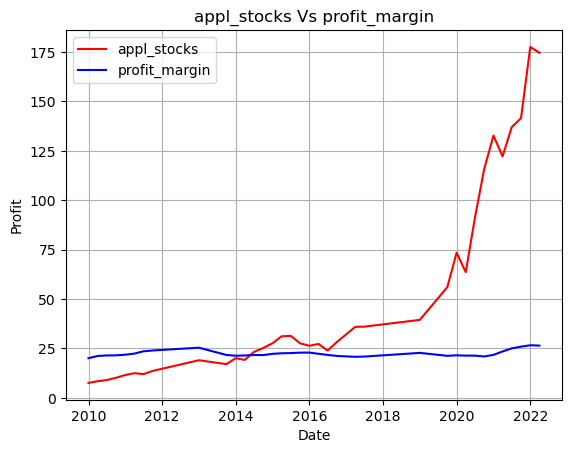

In [24]:
appl_stocks, = plt.plot(close_profit_data['Date'], close_profit_data['Close'], color="red", label="appl_stocks")
profit_margin, = plt.plot(close_profit_data['Date'], close_profit_data['Net Margin'], color="blue", label="profit_margin")
plt.title("appl_stocks Vs profit_margin")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.legend(handles=[appl_stocks, profit_margin], loc="best")
plt.grid()
plt.show()


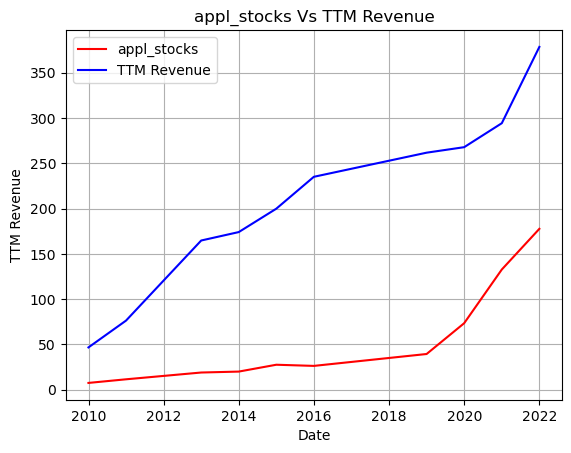

In [25]:
appl_stocks, = plt.plot(quarter1_q1_df['Date'], quarter1_q1_df['Close'], color="red", label="appl_stocks")
TTM_Revenue, = plt.plot(quarter1_q1_df['Date'], quarter1_q1_df['TTM Revenue'], color="blue", label="TTM Revenue")
plt.title("appl_stocks Vs TTM Revenue")
plt.xlabel("Date")
plt.ylabel("TTM Revenue")
plt.legend(handles=[appl_stocks, TTM_Revenue], loc="best")
plt.grid()
plt.show()


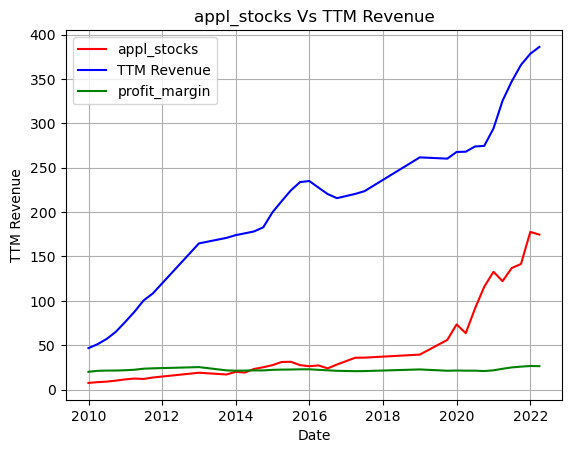

In [26]:
appl_stocks, = plt.plot(close_profit_data['Date'], close_profit_data['Close'], color="red", label="appl_stocks")
TTM_Revenue, = plt.plot(close_profit_data['Date'], close_profit_data['TTM Revenue'], color="blue", label="TTM Revenue")
profit_margin, = plt.plot(close_profit_data['Date'], close_profit_data['Net Margin'], color="green", label="profit_margin")
plt.title("appl_stocks Vs TTM Revenue")
plt.xlabel("Date")
plt.ylabel("TTM Revenue")
plt.legend(handles=[appl_stocks, TTM_Revenue,profit_margin], loc="best")
plt.grid()
plt.show()

The r-value is 0.5777756478783644


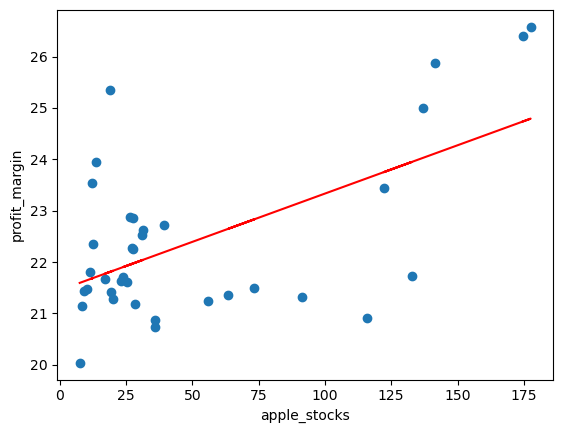

In [27]:
x_values = close_profit_data["Close"]
y_values = close_profit_data["Net Margin"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("apple_stocks")
plt.ylabel("profit_margin")
print(f'The r-value is {rvalue}')

The r-value is 0.8572578506265814


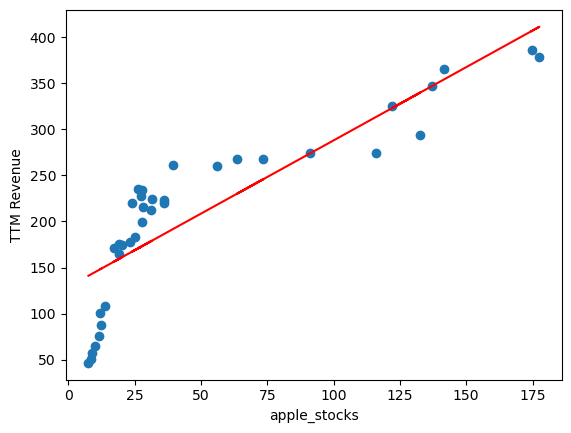

In [28]:
x_values = close_profit_data["Close"]
y_values = close_profit_data["TTM Revenue"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("apple_stocks")
plt.ylabel("TTM Revenue")
print(f'The r-value is {rvalue}')

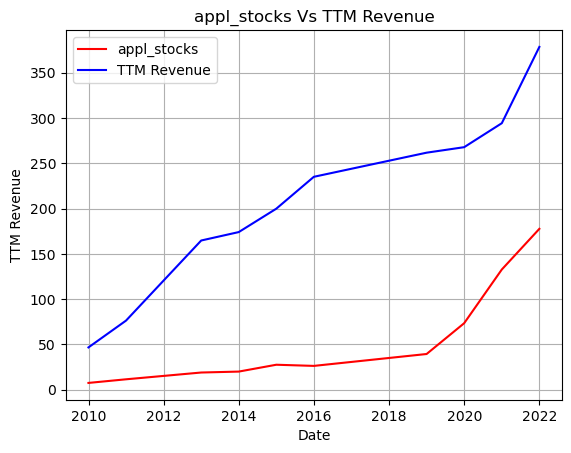

In [29]:
appl_stocks, = plt.plot(quarter1_q1_df['Date'], quarter1_q1_df['Close'], color="red", label="appl_stocks")
TTM_Revenue, = plt.plot(quarter1_q1_df['Date'], quarter1_q1_df['TTM Revenue'], color="blue", label="TTM Revenue")
plt.title("appl_stocks Vs TTM Revenue")
plt.xlabel("Date")
plt.ylabel("TTM Revenue")
plt.legend(handles=[appl_stocks, TTM_Revenue], loc="best")
plt.grid()
plt.show()

The r-value is 0.8379771261311837


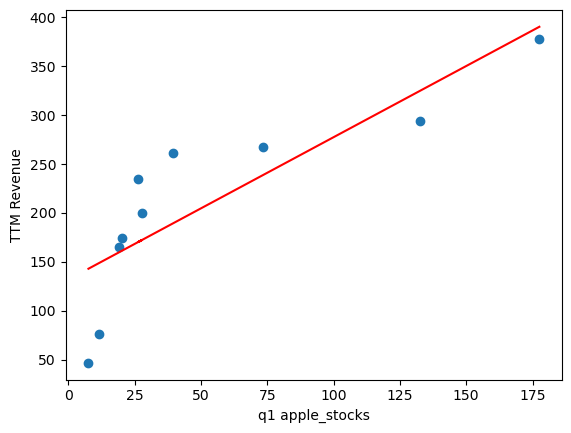

In [20]:
x_values = quarter1_q1_df["Close"]
y_values = quarter1_q1_df["TTM Revenue"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("q1 apple_stocks")
plt.ylabel("TTM Revenue")
print(f'The r-value is {rvalue}')

The r-value is 0.8836117280349763


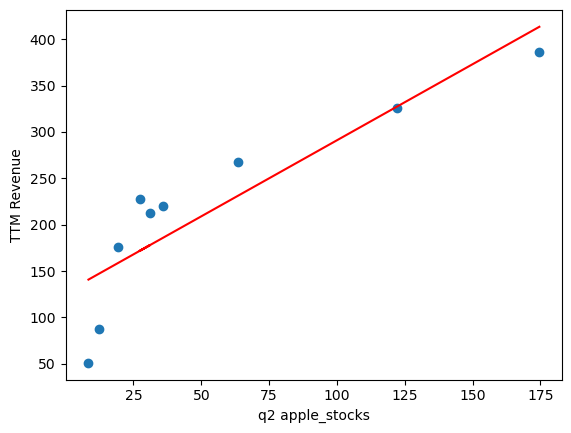

In [30]:
x_values = quarter2_q2_df["Close"]
y_values = quarter2_q2_df["TTM Revenue"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("q2 apple_stocks")
plt.ylabel("TTM Revenue")
print(f'The r-value is {rvalue}')

The r-value is 0.8574521174282663


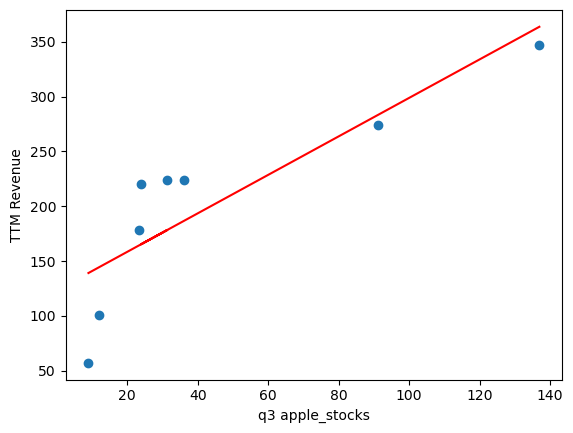

In [31]:
x_values = quarter3_q3_df["Close"]
y_values = quarter3_q3_df["TTM Revenue"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("q3 apple_stocks")
plt.ylabel("TTM Revenue")
print(f'The r-value is {rvalue}')

The r-value is 0.85634750463227


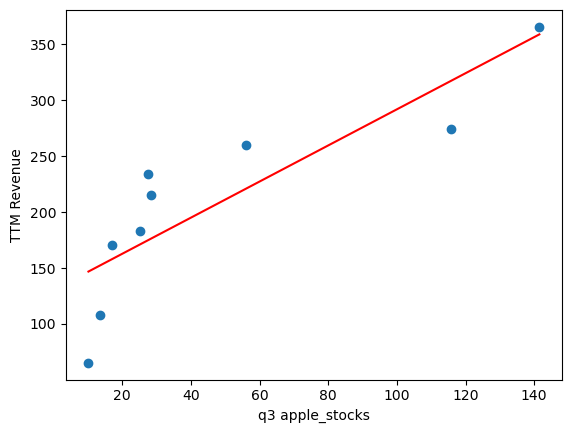

In [32]:
x_values = quarter4_q4_df["Close"]
y_values = quarter4_q4_df["TTM Revenue"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("q3 apple_stocks")
plt.ylabel("TTM Revenue")
print(f'The r-value is {rvalue}')